# **Pandas**

## **1. read_csv()**

Syntax: **pd.read_csv**(filepath_or_buffer, sep=’ ,’ , header=’infer’,  index_col=None, usecols=None, engine=None, skiprows=None, nrows=None) 

**filepath_or_buffer:** Location of the csv file. It accepts any string path or URL of the file.

**sep:** It stands for separator, default is ‘, ‘.

**header:** It accepts int, a list of int, row numbers to use as the column names, and the start of the data. If no names are passed, i.e., header=None, then, it will display the first column as 0, the second as 1, and so on.

**usecols:** Retrieves only selected columns from the CSV file.

**nrows:** Number of rows to be displayed from the dataset.

**index_col:** If None, there are no index numbers displayed along with records.  

**skiprows:** Skips passed rows in the new data frame.

In [ ]:
import pandas as pd
 
# reading csv file 
df = pd.read_csv("people.csv")
print(df.head())

**engine :** parameter is used to specify the parsing engine to be used. This parameter is optional, and by default, pandas tries to infer the best engine based on the input data.

In [ ]:
df = pd.read_csv('sample.csv',
                 sep='[:, |_]',
                 engine='python')
 
print(df)

In [ ]:
df = pd.read_csv('people.csv',
        header=0,
        usecols=["First Name", "Sex", "Email"])
# printing dataframe
print(df.head())

we can simply reindex the header with **index_col** parameter.

In [ ]:
df = pd.read_csv('people.csv',
        header=0,
        index_col=["Sex", "Job Title"],
        usecols=["Sex", "Job Title", "Email"])
 
print(df.head())

we just display only 5 rows using **nrows** parameter.

In [ ]:
df = pd.read_csv('people.csv',
        header=0,
        index_col=["Sex", "Job Title"],
        usecols=["Sex", "Job Title", "Email"],
        nrows=5)
 
print(df)

**skiprows** help to skip some rows in CSV, i.e, here you will observe that the rows mentioned in skiprows have been skipped from the original dataset.

In [ ]:
df= pd.read_csv("people.csv")
print("Previous Dataset: ")
print(df)
# using skiprows
df = pd.read_csv("people.csv", skiprows = [1,5])
print("Dataset After skipping rows: ")
print(df)

#### **1.a Add column names**

**header parameter to None** to prevent pandas from treating the first row as column names

In [ ]:
# Define custom column names
column_names = ['Person_Name', 'Person_Age', 'Person_Gender']

# Read the CSV file with specified column names
df = pd.read_csv('data.csv', header=None, names=column_names)

# Display the DataFrame
print(df)

**Read the CSV file with the first row as column names**

In [ ]:
# Read the CSV file with the first row as column names
df = pd.read_csv('data.csv', header=0)

# Display the DataFrame
print(df)

#### **1.b From Text File**

In [ ]:
data = pd.read_csv('file_name.txt', 
               sep = "\t", 
               header=None,
           names = ['column1_name','column2_name', 'column3_name'])


## **2. Sample()**

Syntax: **DataFrame.sample(n=None, frac=None, replace=False, weights=None, random_state=None, axis=None)** 

**Parameters:** 

**n:** int value, Number of random rows to generate. 

**frac:** Float value, Returns (float value * length of data frame values ). frac cannot be used with n. 

**replace:** Boolean value, return sample with replacement if True. 

**random_state:** int value or numpy.random.RandomState, optional. if set to a particular integer, will return same rows as sample in every iteration. 

**axis:** 0 or ‘row’ for Rows and 1 or ‘column’ for Columns.

In [ ]:
# making data frame from csv file  
data = pd.read_csv("employees.csv") 
  
# generating one row  
row1 = data.sample(n = 1) 

In [ ]:
# making data frame from csv file  
data = pd.read_csv("employees.csv") 
  
# generating one row  
rows = data.sample(frac =.25) 

## **3. info()**

**tool for obtaining a succinct summary of a dataframe. This function is particularly useful during exploratory analysis, offering a quick and informative overview of the dataset.**

In [ ]:
df = pd.read_csv("nba.csv")
# to print the full summary
df.info()

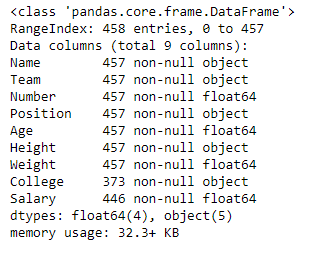

**short summary of the dataframe by setting verbose = False**

In [ ]:
# Print the short summary of the 
# dataframe by setting verbose = False
df.info(verbose = False)

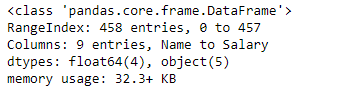

**with null count excluded df.info(verbose = True, null_counts = False)**

In [ ]:
# Print the full summary of the dataframe
# with null count excluded
df.info(verbose = True, null_counts = False)

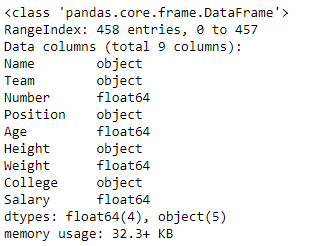

## **4. dtypes()**

In [ ]:
# return the dtype of each column 
result = df.dtypes 
  
# Print the result 
print(result) 

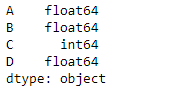

## **5. describe()**

**Pandas describe() is used to view some basic statistical details like percentile, mean, std, etc. of a data frame or a series of numeric values.**

**For the columns with strings, NaN was returned for numeric operations.**


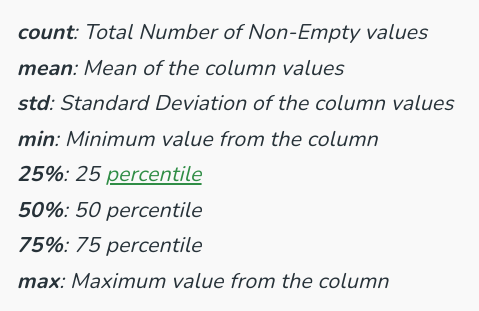

In [ ]:
print(data.descibe())

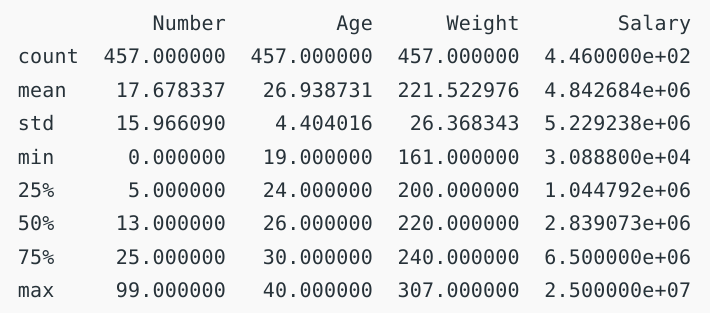

**the behavior of describe() is different with a series of strings. Different stats were returned like count of values, unique values, top, and frequency of occurrence in this case.** 

In [ ]:

# removing null values to avoid errors
data.dropna(inplace=True)
 
# calling describe method
desc = data["Name"].describe()

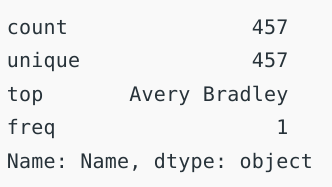

## **merge()**

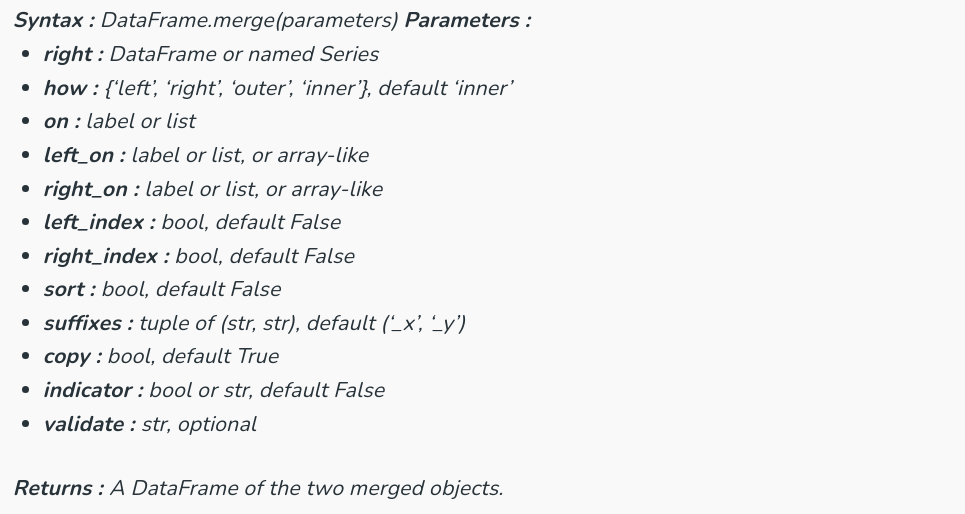

In [12]:
import pandas as pd

df1 = pd.DataFrame({"fruit" : ["apple", "banana", "avocado"], 
                    "market_price" : [21, 14, 35]}) 

df2 = pd.DataFrame({"fruit" : ["banana", "apple", "avocado","orange"], 
                    "wholesaler_price" : [65, 68, 75,50]})

In [13]:
#df1.columns = ["Fruit","Price"]

In [14]:
df1

,fruit,market_price
0,apple,21
1,banana,14
2,avocado,35


In [15]:
df2

,fruit,wholesaler_price
0,banana,65
1,apple,68
2,avocado,75
3,orange,50


In [16]:
pd.merge(df1, df2, on = "fruit", how = "inner") 

,fruit,market_price,wholesaler_price
0,apple,21,68
1,banana,14,65
2,avocado,35,75


In [19]:
pd.merge(df1, df2, on = "fruit", how = "left") 

,fruit,market_price,wholesaler_price
0,apple,21,68
1,banana,14,65
2,avocado,35,75


In [17]:
pd.merge(df1, df2, on = "fruit", how = "right") 

,fruit,market_price,wholesaler_price
0,banana,14.0,65
1,apple,21.0,68
2,avocado,35.0,75
3,orange,NaN,50


In [18]:
pd.merge(df1, df2, on = "fruit", how = "outer") 

,fruit,market_price,wholesaler_price
0,apple,21.0,68
1,banana,14.0,65
2,avocado,35.0,75
3,orange,NaN,50
